In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score

In [2]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_all = concat_df(df_train, df_test)

train_test_data = [df_train, df_test]

In [3]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in train_test_data:
    display_missing(df)

PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




In [4]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [5]:
Age_train = pd.unique(df_train['Age'])
Age_test = pd.unique(df_test['Age'])


mean_Age = round(np.nanmean(Age_train),0)
mean_Age
mean_Age = round(np.nanmean(Age_test),0)
mean_Age

31.0

---
Age
---
- min : 0.42
- max : 80
- mean : 34

In [6]:
df_train['Age'] = df_train['Age'].fillna(34)
df_test['Age'] = df_test['Age'].fillna(31 )

df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [7]:
def show_plt(col):
    plt.figure(figsize= (3, 4))
    sns.set(style='darkgrid')
    sns.countplot(x = col, data = df_train, palette=['Red', 'Blue'])
    plt.title(col, size=15)
    plt.show()

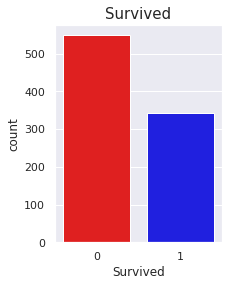

In [8]:
show_plt('Survived')

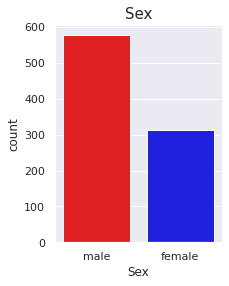

In [9]:
show_plt('Sex')

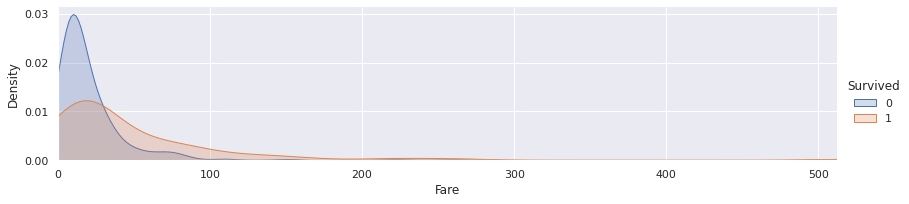

In [10]:
b = sns.FacetGrid(df_train, hue = 'Survived', aspect=4)
b.map(sns.kdeplot, 'Fare', shade= True)
b.set(xlim=(0, df_train['Fare'].max()))
b.add_legend()

<AxesSubplot:>

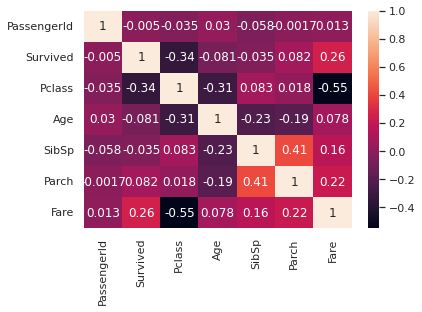

In [11]:
sns.heatmap(df_train.corr(), annot = True)

In [12]:
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
si = SimpleImputer(strategy='most_frequent') # 결측값 최빈값으로 채우기.

df_train['Embarked'] = si.fit_transform(df_train['Embarked'].values.reshape(-1, 1))
df_test['Embarked'] = si.fit_transform(df_test['Embarked'].values.reshape(-1, 1))

In [14]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
# mapping columns datas
def mapping_col(col, col_mapping):
    for dataset in train_test_data:
        dataset[col] = dataset[col].map(col_mapping)

In [16]:
sex_mapping = {'male' : 0 , 'female' : 1}
mapping_col('Sex', sex_mapping)

In [17]:
embarked_mapping = {'S' : 0 , 'C' : 1, 'Q' :2}
mapping_col('Embarked', embarked_mapping)

In [18]:
si_Fare = SimpleImputer(missing_values=np.nan, strategy='mean')
df_test['Fare'] = si_Fare.fit_transform(df_test['Fare'].values.reshape(-1, 1))
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [19]:
mmx = MinMaxScaler()
for dataset in train_test_data:
    dataset['Fare'] = mmx.fit_transform(dataset['Fare'].values.reshape(-1, 1))
    dataset['Age'] = mmx.fit_transform(dataset['Age'].values.reshape(-1, 1))

In [20]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [21]:
print(df_test['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [22]:
print(df_train['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [23]:
title_mapping = {"Mr": 0, "Miss": 0, "Mrs": 0,
                 "Master": 1, "Dr": 1, "Rev": 1, "Col": 1, "Major": 1, "Mlle": 0,"Countess": 1,
                 "Ms": 0, "Lady": 1, "Jonkheer": 1, "Don": 1, "Dona" : 1, "Mme": 0,"Capt": 0,"Sir": 1 }
mapping_col('Title',title_mapping)
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].fillna(0)

In [24]:
for n, i in enumerate(df_train['SibSp']):
    if i != 0:
        df_train['SibSp'][n] = 1
for n, i in enumerate(df_train['Parch']):
    if i != 0:
        df_train['Parch'][n] = 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
for dataset in train_test_data:
    # FamilySize = SibSp + Parch + Self
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    # FamilySize == 0 => 1
    dataset['IsAlone'] = 1
    
    # FamilySize > 1 => 0
    dataset.loc[dataset['FamilySize'] > 1, 'IsAlone'] = 0

In [26]:
# drop col
feature_drop = ['Cabin', 'Name', 'Ticket', 'SibSp', 'Parch', 'FamilySize']

df_train = df_train.drop(feature_drop, axis=1)
df_test = df_test.drop(feature_drop, axis=1)

In [27]:
DS_train = df_train[['PassengerId', 'Sex', 'Pclass', 'Age', 'Fare', 'Embarked', 'Title', 'IsAlone','Survived']]

In [28]:
DS_test = df_test[['PassengerId', 'Sex', 'Pclass', 'Age', 'Fare', 'Embarked', 'Title', 'IsAlone']]

In [29]:
feature_columns = ['Sex', 'Pclass', 'Age', 'Fare', 'Embarked', 'Title', 'IsAlone']
X = DS_train[feature_columns]
y = DS_train['Survived']
X

,Sex,Pclass,Age,Fare,Embarked,Title,IsAlone
0,0,3,0.271174,0.014151,0,0,0
1,1,1,0.472229,0.139136,1,0,0
2,1,3,0.321438,0.015469,0,0,1
3,1,1,0.434531,0.103644,0,0,0
4,0,3,0.434531,0.015713,0,0,1
...,...,...,...,...,...,...,...
886,0,2,0.334004,0.025374,0,1,1
887,1,1,0.233476,0.058556,0,0,1
888,1,3,0.421965,0.045771,0,0,0
889,0,1,0.321438,0.058556,1,0,1


In [30]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
logreg = LogisticRegression(max_iter=30000)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

acc_Log = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_Log)

78.36


In [33]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[138,  30],
       [ 28,  72]])

In [34]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100 , 2)
print(acc_svc)

79.85


In [35]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_linear_svc)

78.36


In [36]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_test)
acc_decisiontree = round(accuracy_score(y_pred, y_test)* 100, 2)
print(acc_decisiontree)

78.36


In [37]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

82.09


In [38]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_knn)

76.87


In [39]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred - sgd.predict(X_test)
acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_sgd)

76.87


In [40]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
acc_gbc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbc)

83.58


In [41]:
ids = DS_test['PassengerId']
pred = gbc.predict(DS_test.drop('PassengerId', axis=1))

output = pd.DataFrame({'PassengerId' : ids, 'Survived' : pred})
output.to_csv('GBCsubmission.csv', index=False) # 0.76794

In [42]:
ids = DS_test['PassengerId']
pred = sgd.predict(DS_test.drop('PassengerId', axis=1))

output = pd.DataFrame({'PassengerId' : ids, 'Survived' : pred})
output.to_csv('SGDsubmission.csv', index=False) # 0.73923

In [43]:
ids = DS_test['PassengerId']
pred = knn.predict(DS_test.drop('PassengerId', axis=1))

output = pd.DataFrame({'PassengerId' : ids, 'Survived' : pred})
output.to_csv('KNNsubmission.csv', index=False) # 0.77272

In [44]:
ids = DS_test['PassengerId']
pred = randomforest.predict(DS_test.drop('PassengerId', axis=1))

output = pd.DataFrame({'PassengerId' : ids, 'Survived' : pred})
output.to_csv('RFsubmission.csv', index=False)# 0.75358

In [45]:
ids = DS_test['PassengerId']
pred = decisiontree.predict(DS_test.drop('PassengerId', axis=1))

output = pd.DataFrame({'PassengerId' : ids, 'Survived' : pred})
output.to_csv('DTsubmission.csv', index=False) # 0.7488

In [46]:
ids = DS_test['PassengerId']
pred = svc.predict(DS_test.drop('PassengerId', axis=1))

output = pd.DataFrame({'PassengerId' : ids, 'Survived' : pred})
output.to_csv('SVCsubmission.csv', index=False) # 0.78468

In [47]:
ids = DS_test['PassengerId']
pred = linear_svc.predict(DS_test.drop('PassengerId', axis=1))

output = pd.DataFrame({'PassengerId' : ids, 'Survived' : pred})
output.to_csv('L_SVCsubmission.csv', index=False)